In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as s
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.stats.anova import anova_lm

In [3]:
data=pd.read_csv('D:/research_paper/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


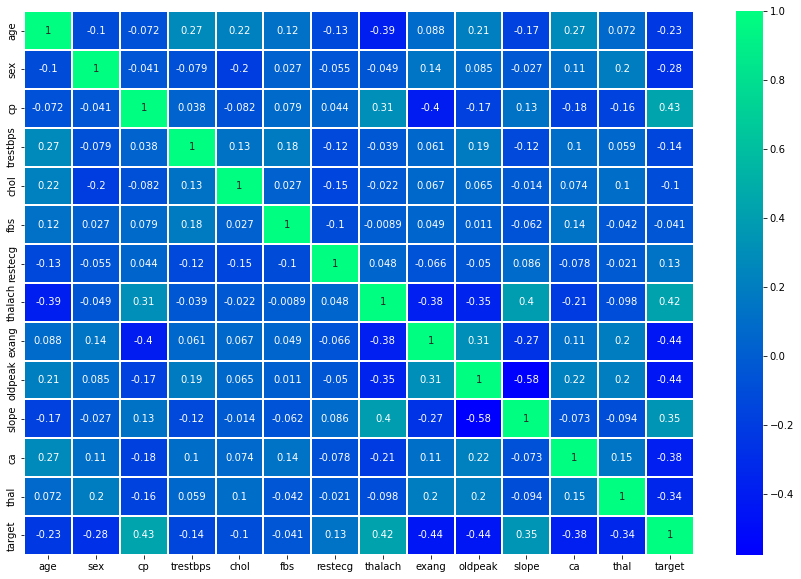

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['target'],axis=1),data['target'],test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((768, 13), (257, 13))

In [32]:
x_train1,x_test1,y_train1,y_test1=train_test_split(data.drop(['target'],axis=1),data['target'],test_size=0.25,random_state=0)
x_train1.shape,x_test1.shape

((768, 13), (257, 13))

In [33]:
x_train2,x_test2,y_train2,y_test2=train_test_split(data.drop(['target'],axis=1),data['target'],test_size=0.25,random_state=0)
x_train2.shape,x_test2.shape

((768, 13), (257, 13))

In [7]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.0247883 , 0.02182629, 0.11835338, 0.05211248, 0.20455276,
       0.        , 0.03951775, 0.15419604, 0.10082372, 0.1243371 ,
       0.00446033, 0.08681213, 0.11952615])

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Testing Accuracy for Logistic Regression: 0.72265625
Testing Sensitivity for Logistic Regression: 0.7295774647887324
Testing Specificity for Logistic Regression: 0.7167070217917676
Testing Precision for Logistic Regression: 0.6888297872340425


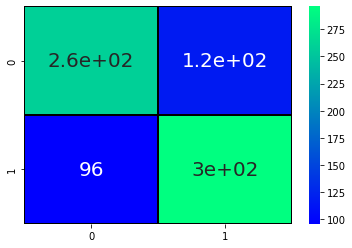

In [41]:
#from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#sc=StandardScaler()
#X_train=sc.fit_transform(x_train)
#X_test=sc.fit_transform(x_train)
lr=LogisticRegression(solver='sag')
model1=lr.fit(x_train,y_train)#,'P2','P&D'
model2=model1.fit(x_train1,y_train1)
model3=model2.fit(x_train2,y_train2)

prediction1=model3.predict(x_train)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [20]:
model1.score(x_test,prediction1)

1.0

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction1,y_test)

0.7782101167315175

In [22]:
cm

array([[ 94,  29],
       [ 28, 106]], dtype=int64)

Testing Accuracy for Random Forest: 1.0
Testing Sensitivity for Random Forest: 1.0
Testing Specificity for Random Forest: 1.0
Testing Precision for Random Forest: 1.0


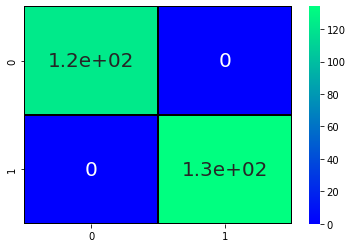

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,min_samples_split=8)
model3 = rfc.fit(x_train, y_train)#,'P2','P&D','G&D'
prediction3 = model3.predict(x_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for Random Forest: 0.7609756097560976
Testing Sensitivity for Random Forest: 0.7184466019417476
Testing Specificity for Random Forest: 0.803921568627451
Testing Precision for Random Forest: 0.7872340425531915


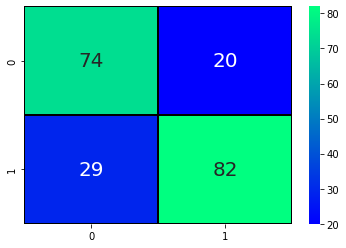

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction2=knn.predict(x_train1)
cm4=confusion_matrix(y_train1, prediction2)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for Random Forest: 0.848780487804878
Testing Sensitivity for Random Forest: 0.8315789473684211
Testing Specificity for Random Forest: 0.8636363636363636
Testing Precision for Random Forest: 0.8404255319148937


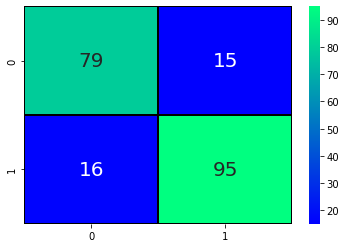

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict1=nb.predict(x_train1)
cm6=confusion_matrix(y_train1, y_predict1)
sns.heatmap(cm6, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for SVM: 0.7219512195121951
Testing Sensitivity for Random Forest: 0.6947368421052632
Testing Specificity for Random Forest: 0.7454545454545455
Testing Precision for Random Forest: 0.7021276595744681


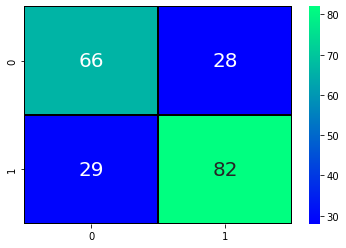

In [20]:
from sklearn.svm import SVC
svm=SVC()#C=12,kernel='linear'
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_train1)
cm4= confusion_matrix(y_train1,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for SVM: 0.9560975609756097
Testing Sensitivity for Random Forest: 0.9292929292929293
Testing Specificity for Random Forest: 0.9811320754716981
Testing Precision for Random Forest: 0.9787234042553191


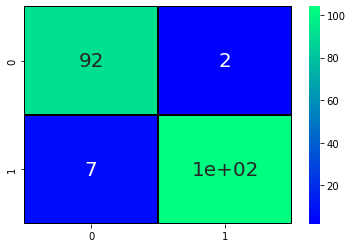

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier(random_state=42)
df=clf1.fit(x_train,y_train)
y_predict=df.predict(x_train1)
cm4= confusion_matrix(y_train1,y_predict)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for SVM: 0.43414634146341463
Testing Sensitivity for Random Forest: 0.3917525773195876
Testing Specificity for Random Forest: 0.4722222222222222
Testing Precision for Random Forest: 0.4


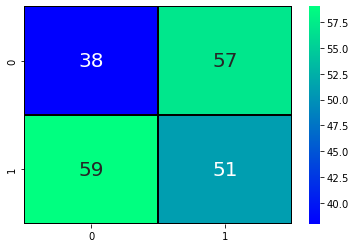

In [25]:
np.round(predict)

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1.])